# 4. 다양한 분류 알고리즘
로지스틱 회귀, 확률적 경사 하강법
이진 분류, 다중 분류의 차이

## 4-1. 로지스틱 회귀

### 접근 1. 아는 걸로 접근해볼까? k-nearest neighbors

즉, 주변 이웃의 클래스 비율을 확률으로 나타내기

데이터 준비하기

In [1]:
# 데이터 가져오기
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 생선 종류 추출하기
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# target 값인 생선 종류를 제외하고 input data 만들기
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

In [5]:
# 데이터셋을 표준화하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k 최근접 이웃 분류기를 활용하여 확률 예측하기
(가까운 이웃의 클래스 비율)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [9]:
# 타깃값
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
# 처음 5개 샘플에 대한 예측값
print(kn.predict(test_scaled[:5]))

# 왜 이렇게 나온거지? -> 클래스별 확률 예측값
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


로지스틱 회귀 logistic regression
- 시그모이드 함수 / 소프트맥스 함수를 이용하여 클래스 확률을 출력함
  - 시그모이드 함수 : 선형 방정식의 출력을 (0, 1) 값으로 압축하여 이진분류를 위해 사용
  - 소프트맥스 함수 : 다중 분류에서 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만듦


- 로지스틱 회귀는 선형 방정식을 학습한다


$z=a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$

- 위 식을 확률로 나타내기 위해 시그모이드 함수 sigmoid function을 활용한다


$ \theta =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} }  $


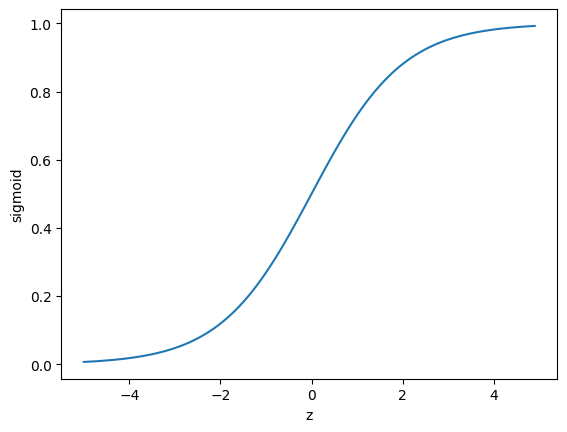

In [15]:
# sigmoid 함수의 시각화
# sigmoid는 0.5 이상이면 양성 클래스, 0.5 미만이면 음성 클래스로 판단함
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("sigmoid")
plt.show()

로지스틱 회귀로 이진 분류 수행하기

In [17]:
# 불리언 인덱싱
char_arr = np.array(["A", "B", "C", "D", "E"])
print(char_arr[[True, False, True, False, False]])

# 이런 방식으로 도미/빙어 이진 분류하기
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes] # bream/smelt 데이터만 골라내기
target_bream_smelt = train_target[bream_smelt_indexes] # bream/smelt 데이터만 골라내기

# 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 샘플 예측
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

['A' 'C']
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [18]:
# 로지스틱 회귀 수행 결과
print(lr.coef_, lr.intercept_)
# z = [0]*weight + [1]*length + [2]*diagonal + [3]*height + [4]*width + intercept

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [20]:
# z값 계산하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

# z값을 시그모이드 함수에 넣으면 분류 최종 값 확인 가능함
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


로지스틱 회귀로 다중 분류 수행하기

In [21]:
# 로지스틱 회귀 모델 
# C는 규제 정도, 작을 수록 더 규제함(L2 규제)
# max_iter는 학습하는 횟수
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target) # 전체 데이터 
print(lr.score(train_scaled, train_target)) # 훈련 셋 점수 
print(lr.score(test_scaled, test_target)) # 테스트 셋 점수

0.9327731092436975
0.925


In [22]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [23]:
# 5개 샘플에 대한 예측 확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [24]:
# 다중 분류의 선형 방정식
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


소프트맥스 함수 softmax : 클래스마다 z값을 계산한다

$ e_sum = e^{z1} + e^{z2} + ..$


$ s1 = frac{e^{z1}}{e_sum}$


$ s2 = frac{e^{z2}}{e_sum}$


...


$ sigmoid = s1 + s2 + s3 + ...$ 

In [25]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 4-2. 확률적 경사 하강법
- 확률적 경사 하강법 Stochastic Gradient Descent
  - 점진적인 학습 알고리즘
  - 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련시키기


- 확률적
  - 전체 훈련 셋을 사용하지 않고, 
  - 하나의 샘플을 랜덤하게 골라 가장 가파른 길을 찾는다
  - 이 과정을 반복한다 (epoch : 훈련 셋을 "한번" 모두 사용하는 과정)


- 미니배치 경사 하강법 minibatch gradient descent
  - 여러 개의 샘플을 사용해서 경사 하강법을 수행하기


- 배치 경사 하강법 batch gradient descent
  - 전체 샘플을 사용하기

- 손실 함수 loss function
  - 샘플 하나에 대한 손실을 정의한다
  - 로지스틱 손실 함수 = binary cross-entropy loss function
    - 이진 분류에서 사용
  - 크로스엔트로피 손실 함수
    - 다중 분류에서 사용
  - 평균 제곱 오차 mean square error
    - 회귀에서 사용

In [26]:
# 데이터 준비
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

In [27]:
# input과 target
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [28]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss="log", max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\.venv\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [29]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


에포크의 과대/과소적합

에포크가 너무 적으면 언더피팅 

에포크가 너무 크면 오버피팅

둘을 조정하기 위해 early stopping이 존재함

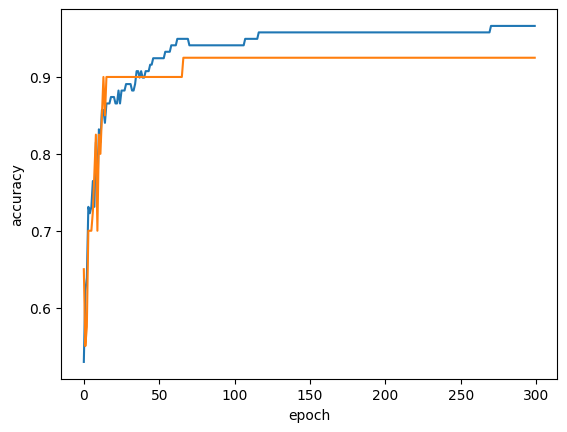

In [32]:
import numpy as np
sc = SGDClassifier(loss="log_loss", random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0, 300):
    # 300번 에포크를 반복
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

# 반복한 결과를 시각화
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [33]:
# SGDClassifier는 성능이 향상되지 않으면 멈춤
sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
